In [2]:
import pandas as pd

# Load the datasets
dataset_path = 'dataset.csv'
drug1_path = 'drug1 2.csv'

# Load the datasets into DataFrames
dataset_df = pd.read_csv(dataset_path)
drug1_df = pd.read_csv(drug1_path)

dataset_head = dataset_df.head()
drug1_head = drug1_df.head()

dataset_head, drug1_head
 

(  web-scraper-order                            web-scraper-start-url  \
 0      1698600802-3  https://www.1mg.com/drugs-all-medicines?page=50   
 1      1698600802-3  https://www.1mg.com/drugs-all-medicines?page=50   
 2    1698606345-964  https://www.1mg.com/drugs-all-medicines?page=18   
 3    1698606345-964  https://www.1mg.com/drugs-all-medicines?page=18   
 4      1698600815-7  https://www.1mg.com/drugs-all-medicines?page=50   
 
                                                Links  \
 0  Aceloflam Plus TabletMRP₹94Prescription Requir...   
 1  Aceloflam Plus TabletMRP₹94Prescription Requir...   
 2  Aceloflam Plus TabletMRP₹63Prescription Requir...   
 3  Aceloflam Plus TabletMRP₹63Prescription Requir...   
 4  Adriamycin 50mg InjectionMRP₹889Prescription R...   
 
                                           Links-href  \
 0  https://www.1mg.com/drugs/aceloflam-plus-table...   
 1  https://www.1mg.com/drugs/aceloflam-plus-table...   
 2  https://www.1mg.com/drugs/aceloflam-plus-

In [3]:
# Check for missing values 
missing_values_dataset = dataset_df.isnull().sum()

missing_values_drug1 = drug1_df.isnull().sum()

missing_values_dataset, missing_values_drug1


(web-scraper-order            0
 web-scraper-start-url        0
 Links                        0
 Links-href                   0
 Name                         0
 Uses                       163
 Price                     9381
 Composition                  0
 Side_effects               635
 Alcohol                   4785
 Pregnancy                  175
 Breast feeding            1449
 Driving                   5343
 Kidney                    6280
 Liver                     6280
 Poor                     17833
 Excellent                20683
 Average                  24163
 How_to_use                  33
 Status                    3529
 manufacturer                 0
 Unit Quantity            13300
 Unit Type                 2030
 dtype: int64,
 drug           0
 dosage         0
 condition      0
 review         0
 rating         0
 usefulCount    0
 bp             0
 sugar          0
 temperature    0
 age            0
 Sideeffects    0
 dtype: int64)

In [4]:
# Clean the Price 
dataset_df['Price'] = dataset_df['Price'].replace('[₹,]', '', regex=True)
dataset_df['Price'] = pd.to_numeric(dataset_df['Price'], errors='coerce')

#substituting the missing values 
numerical_columns = ['Price', 'Unit Quantity']
for col in numerical_columns:
    dataset_df[col].fillna(dataset_df[col].median(), inplace=True)

missing_values_after_imputation = dataset_df.isnull().sum()
missing_values_after_imputation


web-scraper-order            0
web-scraper-start-url        0
Links                        0
Links-href                   0
Name                         0
Uses                       163
Price                        0
Composition                  0
Side_effects               635
Alcohol                   4785
Pregnancy                  175
Breast feeding            1449
Driving                   5343
Kidney                    6280
Liver                     6280
Poor                     17833
Excellent                20683
Average                  24163
How_to_use                  33
Status                    3529
manufacturer                 0
Unit Quantity                0
Unit Type                 2030
dtype: int64

In [5]:
# Standardize drug names in both datasets
dataset_df['Name'] = dataset_df['Name'].str.lower().str.strip()
drug1_df['drug'] = drug1_df['drug'].str.lower().str.strip()

# Standardize side effects in both datasets
dataset_df['Side_effects'] = dataset_df['Side_effects'].str.lower().str.strip()
drug1_df['Sideeffects'] = drug1_df['Sideeffects'].str.lower().str.strip()

dataset_df['Side_effects'] = dataset_df['Side_effects'].str.split(',')
drug1_df['Sideeffects'] = drug1_df['Sideeffects'].str.split(',')

dataset_df['Composition'] = dataset_df['Composition'].str.lower().str.strip()

# Preview the standardized data
standardized_sample = {
    'dataset_sample': dataset_df[['Name', 'Side_effects', 'Composition']].head(),
    'drug1_sample': drug1_df[['drug', 'Sideeffects']].head()
}
standardized_sample


{'dataset_sample':                         Name  \
 0      aceloflam plus tablet   
 1      aceloflam plus tablet   
 2      aceloflam plus tablet   
 3      aceloflam plus tablet   
 4  adriamycin 50mg injection   
 
                                         Side_effects  \
 0  [nauseavomitingstomach pain/epigastric painlos...   
 1  [nauseavomitingstomach pain/epigastric painlos...   
 2  [nauseavomitingstomach pain/epigastric painlos...   
 3  [nauseavomitingstomach pain/epigastric painlos...   
 4  [vomitingallergic reactionnauseamouth sorehair...   
 
                                  Composition  
 0  aceclofenac (100mg) + paracetamol (325mg)  
 1  aceclofenac (100mg) + paracetamol (325mg)  
 2  aceclofenac (100mg) + paracetamol (325mg)  
 3  aceclofenac (100mg) + paracetamol (325mg)  
 4                 doxorubicin (plain) (50mg)  ,
 'drug1_sample':           drug               Sideeffects
 0  mirtazapine               [dizziness]
 1   mesalamine                [headache]
 2     

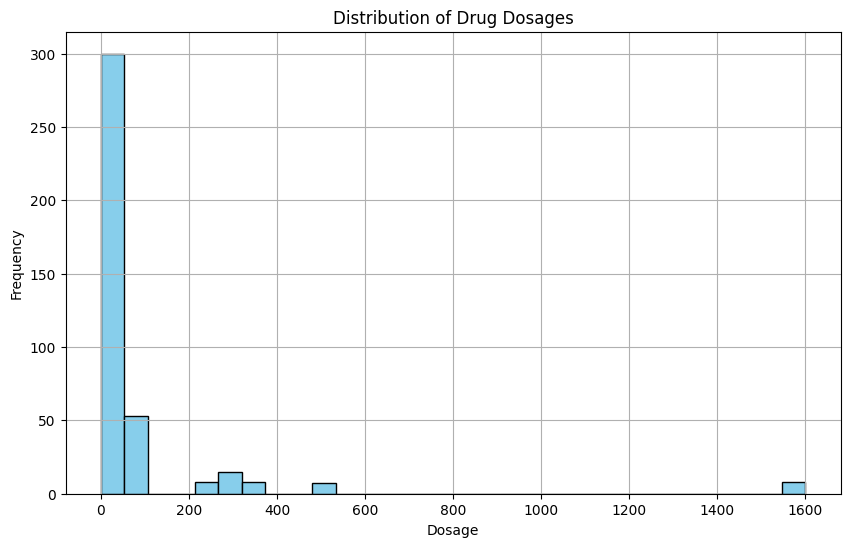

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
drug1_df['dosage'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Drug Dosages')
plt.xlabel('Dosage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

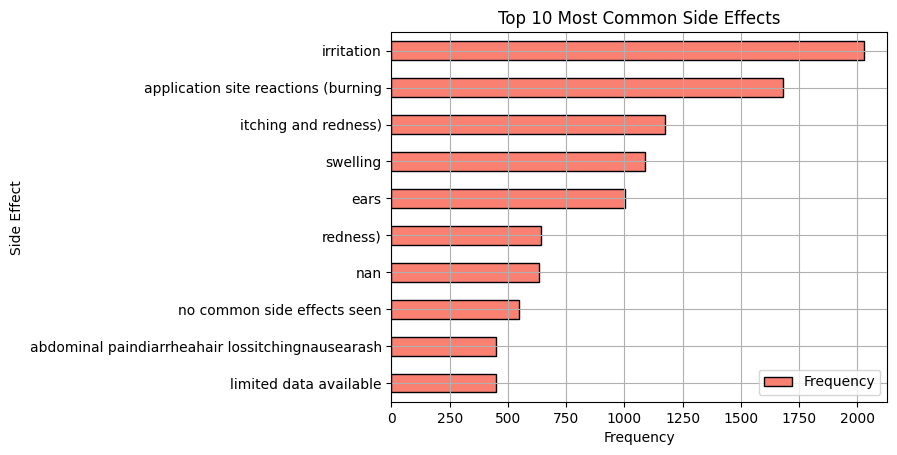

,Side Effect,Frequency
51,irritation,2027
50,application site reactions (burning,1680
70,itching and redness),1175
34,swelling,1088
15,ears,1004
152,redness),640
49,nan,635
196,no common side effects seen,549
375,abdominal paindiarrheahair lossitchingnausearash,448
25,limited data available,447


In [8]:
# Ensure all entries in the 'Side_effects' column are lists or strings
dataset_df['Side_effects'] = dataset_df['Side_effects'].apply(lambda x: x if isinstance(x, list) else str(x).split(','))

side_effects_flattened = [effect.strip() for sublist in dataset_df['Side_effects'] for effect in sublist]

side_effects_counter = Counter(side_effects_flattened)

# Convert the counter to a DataFrame for better visualization
side_effects_df = pd.DataFrame(side_effects_counter.items(), columns=['Side Effect', 'Frequency'])

side_effects_df = side_effects_df.sort_values(by='Frequency', ascending=False)

# Plot the top 10 most common side effects
plt.figure(figsize=(12, 8))
side_effects_df.head(10).plot(kind='barh', x='Side Effect', y='Frequency', color='salmon', edgecolor='black')
plt.title('Top 10 Most Common Side Effects')
plt.xlabel('Frequency')
plt.ylabel('Side Effect')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

side_effects_df.head(10)


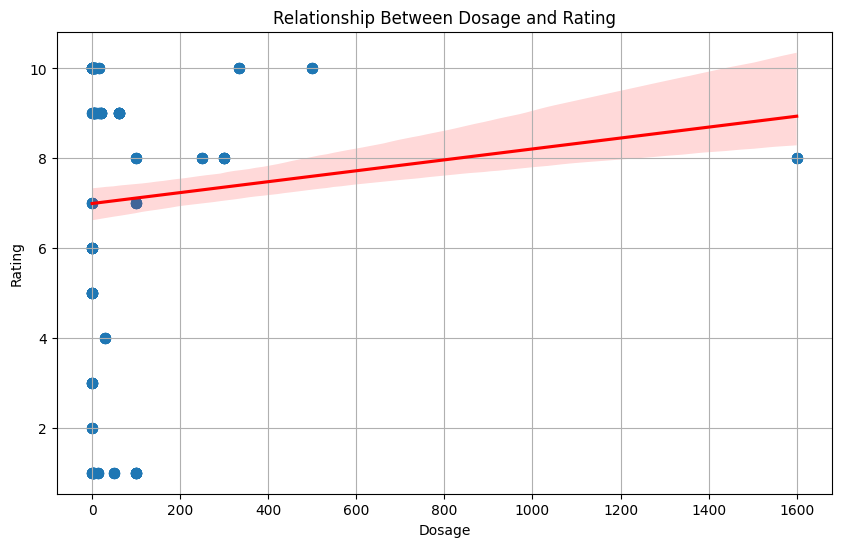

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=drug1_df['dosage'], y=drug1_df['rating'], scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title('Relationship Between Dosage and Rating')
plt.xlabel('Dosage')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


In [10]:
from textblob import TextBlob

# Preprocess the review text 
drug1_df['cleaned_review'] = drug1_df['review'].str.lower().str.strip()

# Apply sentiment analysis using TextBlob
drug1_df['sentiment'] = drug1_df['cleaned_review'].apply(lambda review: TextBlob(review).sentiment.polarity)

drug1_df[['cleaned_review', 'sentiment']].head()


,cleaned_review,sentiment
0,"""i&#039;ve tried a few antidepressants over th...",0.000000
1,"""i am newly diagnosed with lc, i am 38 years o...",-0.011088
2,"""quick reduction of symptoms""",0.333333
3,"""contrave combines drugs that were used for al...",0.139063
4,"""i was on this pill for almost two years. it d...",-0.005889


In [11]:
# Calculate the correlation between dosage and sentiment
correlation_dosage_sentiment = drug1_df['dosage'].corr(drug1_df['sentiment'])

# Bin the dosage into categories: low, medium, high
drug1_df['dosage_category'] = pd.cut(drug1_df['dosage'], bins=[0, 50, 150, drug1_df['dosage'].max()], labels=['Low', 'Medium', 'High'])

# Calculate the average sentiment score for each dosage category
average_sentiment_by_dosage = drug1_df.groupby('dosage_category')['sentiment'].mean()

correlation_dosage_sentiment, average_sentiment_by_dosage


(-0.09870717238538114,
 dosage_category
 Low       0.088354
 Medium    0.117337
 High      0.080437
 Name: sentiment, dtype: float64)

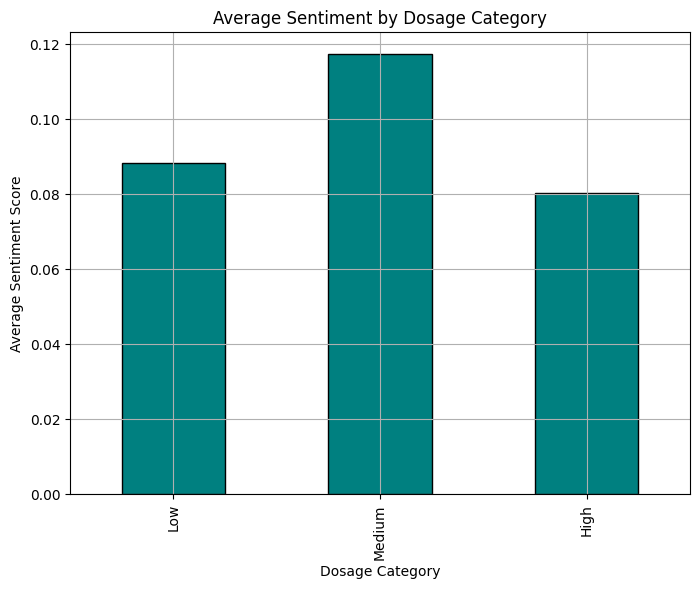

In [12]:

plt.figure(figsize=(8, 6))
average_sentiment_by_dosage.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Average Sentiment by Dosage Category')
plt.xlabel('Dosage Category')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

features = drug1_df[['dosage', 'sentiment', 'Sideeffects']]
target = drug1_df['rating']

# Encoding the 'Sideeffects' column (count of side effects as a feature)
features['side_effects_count'] = features['Sideeffects'].apply(len)

# Drop the original 'Sideeffects' column as we have encoded it
features = features.drop(columns=['Sideeffects'])

scaler = StandardScaler()
features[['dosage', 'sentiment']] = scaler.fit_transform(features[['dosage', 'sentiment']])

features.head()


/var/folders/qz/d_bbgpmn6cb3v7k9_1nqm_b00000gn/T/ipykernel_16534/3659880453.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['side_effects_count'] = features['Sideeffects'].apply(len)


,dosage,sentiment,side_effects_count
0,-0.267876,-0.545542,1
1,0.713186,-0.611803,1
2,-0.329495,1.446411,1
3,-0.297100,0.285476,1
4,-0.329871,-0.580733,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((279, 3), (120, 3), (279,), (120,))

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.011893333333333336, 0.9988743295825008)

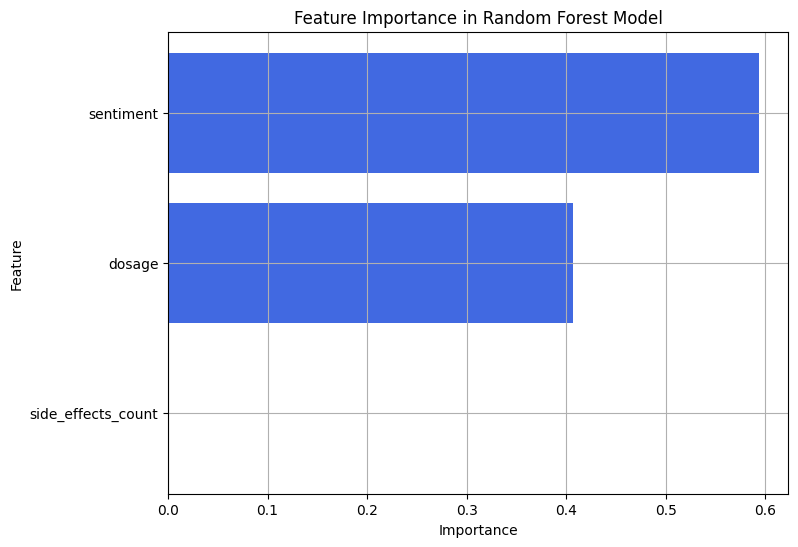

,Feature,Importance
1,sentiment,0.593112
0,dosage,0.406888
2,side_effects_count,0.000000


In [16]:
# Analyze feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

feature_importance_df


In [17]:
scaler = StandardScaler()
scaler.fit(X_train[['dosage']])

# Convert the optimal dosage back to the original scale
optimal_dosage_original_scale = scaler.inverse_transform([[-0.26302576495044483]])[0][0]

optimal_dosage_original_scale


-0.2762392776221282

In [18]:

drug_categories = drug1_df['condition'].unique()

# Create a dictionary to store dosage recommendations for each category
category_recommendations = {}

for category in drug_categories:
    category_data = drug1_df[drug1_df['condition'] == category]
    
    predicted_dosages = rf_model.predict(
        [[dosage, 0, 0] for dosage in category_data['dosage']]
    )
    

    optimal_dosage = category_data['dosage'].iloc[predicted_dosages.argmax()]
    
    category_recommendations[category] = optimal_dosage

category_recommendations


/Users/iramkamdar/opt/anaconda3/envs/Gnowitt/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/iramkamdar/opt/anaconda3/envs/Gnowitt/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/iramkamdar/opt/anaconda3/envs/Gnowitt/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/iramkamdar/opt/anaconda3/envs/Gnowitt/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/iramkamdar/opt/anaconda3/envs/Gnowitt/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid fea

{'Depression': 15.0,
 'Lymphocytic Colitis': 250.0,
 'Urinary Tract Infection': 500.0,
 'Weight Loss': 8.0,
 'Birth Control': 1.5,
 'Vaginal Yeast Infection': 0.0003,
 'Narcolepsy': 15.0,
 'Insomnia': 50.0,
 'Bipolar Disorde': 5.0,
 'Hyperhidrosis': 5.0,
 'Panic Disorde': 0.5,
 'Rosacea': 3.0,
 'Bowel Preparation': 1600.0,
 'Constipation, Drug Induced': 12.5,
 'Diabetes, Type 2': 30.0,
 'Pain': 20.0,
 'Alcohol Dependence': 333.0,
 'Emergency Contraception': 1.5,
 'Major Depressive Disorde': 300.0,
 'Anxiety': 0.25,
 'Acne': 0.451,
 'Cough and Nasal Congestion': 60.0}

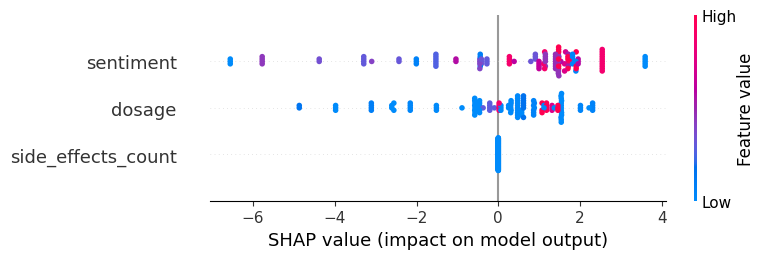

In [22]:
import shap


explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

# SHAP force plot for the first instance in the validation set
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])
